In [1]:
# Clean ARIMA setup for Colab (Python 3.12, 2025)
!pip uninstall -y numpy pandas scipy statsmodels pmdarima

# Install stable compatible versions
!pip install numpy==1.26.4 pandas==2.2.2 scipy==1.11.4 statsmodels==0.14.0 pmdarima==2.0.4


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.16.2
Uninstalling scipy-1.16.2:
  Successfully uninstalled scipy-1.16.2
Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.2 MB/s eta 0:00

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("/content/exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
df=pd.read_csv("/content/exchange_rate.csv",index_col=0,parse_dates=True)

In [4]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [5]:
df.shape

(7588, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 376.6+ KB


In [7]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


<Axes: xlabel='date'>

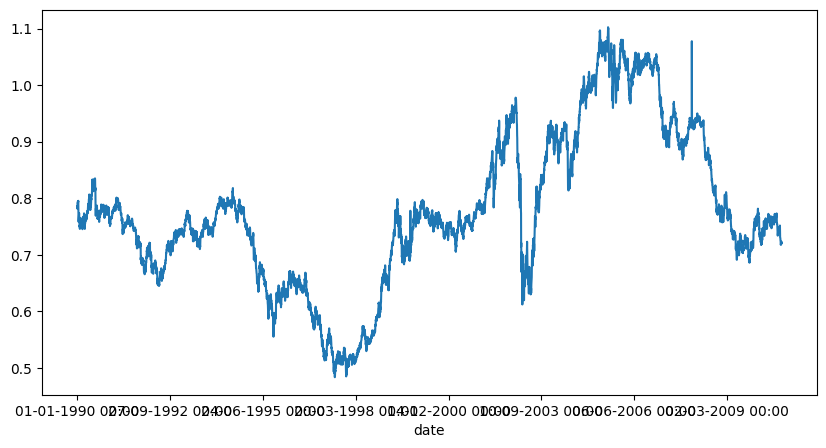

In [8]:
df['Ex_rate'].plot(figsize=(10,5))

In [9]:
adfuller(df['Ex_rate'])[1] #P-Value

0.4492327353597477

**Null hypothesis: Data is Non-stationary**

**Alternate Hypothesis: Data is Stationary**
   


- If p< 0.05 ; Data is stationary

- if p>0.05; Data is not stationary

**According to the p-value, the dataset is not stationary as the p value is greater than alpha value.**

# **ARIMA Model Building**

In [10]:
order = auto_arima(df['Ex_rate'])

In [14]:
order

# AR(1): The 1 here refers to the Auto-Regressive (AR) part of the model, which uses the previous value(s) in the series to predict the current value.
# AR(1) means the model uses the immediate previous value to predict the current value.
# I(1): The 1 indicates the order of differencing required to make the series stationary.

# MA(0): The 0 here refers to the Moving Average (MA) part of the model, which uses the past error terms to predict the current value.
# MA(0) means the model uses the last 0 error terms.

# Seasonal Component (0,0,0)[0]
# (0, 0, 0):

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
df.shape

(7588, 1)

# **Splitting the data**

In [15]:
#Split the data
train = df.iloc[:-588]
test = df.iloc[-588:]

In [16]:
train

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
25-02-2009 00:00,0.791734
26-02-2009 00:00,0.787929
27-02-2009 00:00,0.788799


In [17]:
test

,Ex_rate
date,
02-03-2009 00:00,0.782320
03-03-2009 00:00,0.782718
04-03-2009 00:00,0.774293
05-03-2009 00:00,0.772052
06-03-2009 00:00,0.764614
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [19]:
model = ARIMA(train['Ex_rate'], order=(1, 1, 0)).fit()

# **Evaluating the model**

In [20]:
train

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
25-02-2009 00:00,0.791734
26-02-2009 00:00,0.787929
27-02-2009 00:00,0.788799


In [22]:
ypred = model.predict(start =7000, end =7587)
ypred

,predicted_mean
7000,0.782263
7001,0.782271
7002,0.782270
7003,0.782270
7004,0.782270
...,...
7583,0.782270
7584,0.782270
7585,0.782270
7586,0.782270


In [24]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))
# 0.04 got very less error

0.04879368102591697


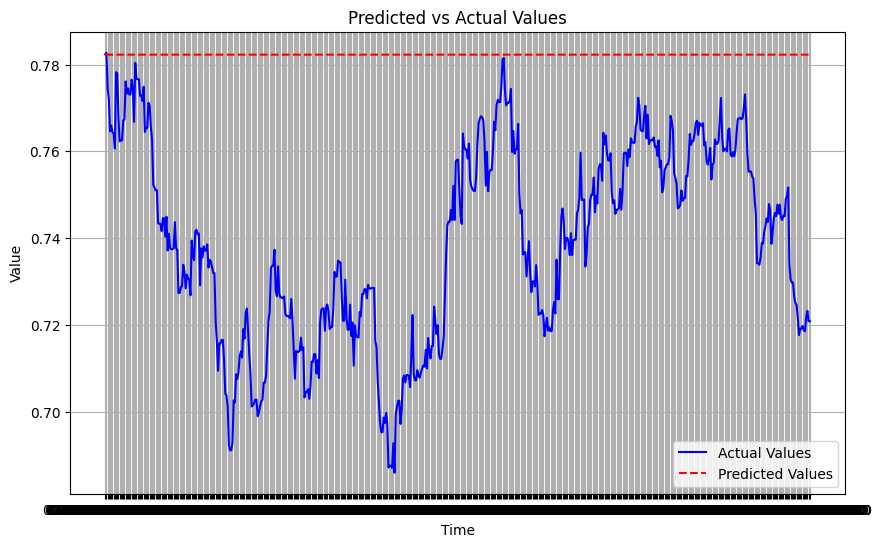

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(test, label='Actual Values', color='blue')
plt.plot(test.index, ypred, label='Predicted Values', color='red', linestyle='--')

plt.title('Predicted vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# **Model Building - Exponential Smoothing**

Simple Exponential Smoothing
No Trend and Seasonality is present

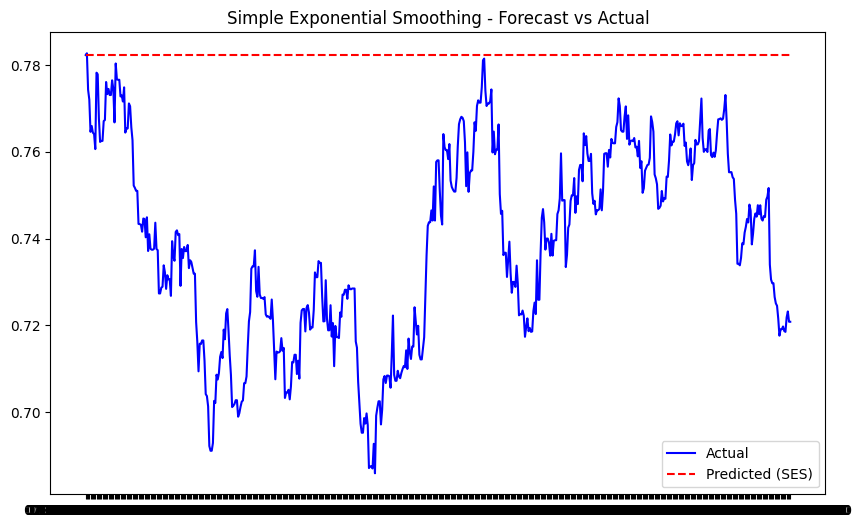

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train)
fit = model.fit(optimized=True)
pred = fit.forecast(len(test))

plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, pred, label='Predicted (SES)', color='red', linestyle='--')
plt.title('Simple Exponential Smoothing - Forecast vs Actual')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
metrics = pd.DataFrame({
    'Model': ['ARIMA', 'Exponential Smoothing'],
    'MAE': [
        mean_absolute_error(test, ypred),
        mean_absolute_error(test, pred)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(test, ypred)),
        np.sqrt(mean_squared_error(test, pred))
    ],
    'MAPE (%)': [
        mean_absolute_percentage_error(test, ypred)*100,
        mean_absolute_percentage_error(test, pred)*100
    ]
})

print(metrics)


                   Model       MAE      RMSE  MAPE (%)
0                  ARIMA  0.043293  0.048794  5.957463
1  Exponential Smoothing  0.043405  0.048894  5.972672


Interpretation:
Lower values for MAE, RMSE, and MAPE indicate better performance.

Model Comparison

The ARIMA model achieved an RMSE of 0.048794 and MAPE of 5.95 %, while the Simple Exponential Smoothing model recorded an RMSE of 0.048894 and MAPE of 5.97%.

Thus, ARIExponential smoothing demonstrated slightly better predictive accuracy.

However, SES has advantages in simplicity, faster computation, and interpretability, especially for stable, level-stationary series.
ARIMA, though more complex, captures autocorrelation patterns more effectively, which benefits exchange-rate data that often exhibit short-term dependencies.